In [1]:
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2

In [2]:
key_points = pd.read_csv('train-test-data/training_frames_keypoints.csv')

In [3]:
key_points.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,126,127,128,129,130,131,132,133,134,135
0,Luis_Fonsi_21.jpg,45.0,98.0,47.0,106.0,49.0,110.0,53.0,119.0,56.0,...,83.0,119.0,90.0,117.0,83.0,119.0,81.0,122.0,77.0,122.0
1,Lincoln_Chafee_52.jpg,41.0,83.0,43.0,91.0,45.0,100.0,47.0,108.0,51.0,...,85.0,122.0,94.0,120.0,85.0,122.0,83.0,122.0,79.0,122.0
2,Valerie_Harper_30.jpg,56.0,69.0,56.0,77.0,56.0,86.0,56.0,94.0,58.0,...,79.0,105.0,86.0,108.0,77.0,105.0,75.0,105.0,73.0,105.0
3,Angelo_Reyes_22.jpg,61.0,80.0,58.0,95.0,58.0,108.0,58.0,120.0,58.0,...,98.0,136.0,107.0,139.0,95.0,139.0,91.0,139.0,85.0,136.0
4,Kristen_Breitweiser_11.jpg,58.0,94.0,58.0,104.0,60.0,113.0,62.0,121.0,67.0,...,92.0,117.0,103.0,118.0,92.0,120.0,88.0,122.0,84.0,122.0


In [4]:
n = 0 
image_name = key_points.iloc[n,0]
key = key_points.iloc[n, 1:].to_numpy()
key = key.astype('float').reshape(-1,2)

print('Image name: ', image_name)
print('Landmarks shape: ',key.shape)
print('First 4 key points: {}'.format(key[:4]))

Image name:  Luis_Fonsi_21.jpg
Landmarks shape:  (68, 2)
First 4 key points: [[ 45.  98.]
 [ 47. 106.]
 [ 49. 110.]
 [ 53. 119.]]


In [5]:
print("Number of images: ",key_points.shape[0])

Number of images:  3462


In [6]:
def show_keypoints(image, key):
    plt.imshow(image)
    plt.scatter(key[:,0],key[:,1], s=20,marker='.',c = 'm')

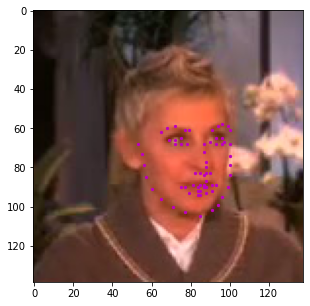

In [7]:
n = 300

image_name = key_points.iloc[n,0]
key = key_points.iloc[n, 1:].to_numpy()
key = key.astype('float').reshape(-1,2)

plt.figure(figsize=(5,5))
show_keypoints(mpimg.imread(os.path.join('train-test-data/training/', image_name)), key)
plt.show()

In [8]:
#Example for Resizing Image and Resizing keypoints
n = 300
image_name = key_points.iloc[n,0]

img = cv2.imread('train-test-data/training/'+image_name)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
x,y,z = img.shape
img = cv2.resize(img,(224,224))

key = key_points.iloc[n, 1:].to_numpy()
key = key.astype('float').reshape(-1,2)

key = key *[224/y,224/x]

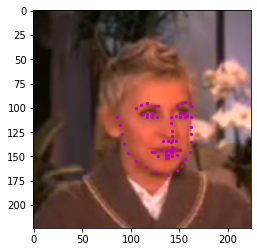

In [9]:
show_keypoints(img,key)